In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
directory_256 = "./b_256_csv"
dataframes_256 = []

for filename in os.listdir(directory_256):

    file_path = os.path.join(directory_256, filename)
    df = pd.read_csv(file_path)
    dataframes_256.append(df)

combined_df_256 = pd.concat(dataframes_256)

combined_df_256.to_csv("csv_256.csv", index=False)

directory_128 = "./b_128_csv"
dataframes_128 = []

for filename in os.listdir(directory_128):

    file_path = os.path.join(directory_128, filename)
    df = pd.read_csv(file_path)
    dataframes_128.append(df)

combined_df_128 = pd.concat(dataframes_128)

combined_df_128.to_csv("csv_128.csv", index=False)

directory_518 = "./b_518_csv"
dataframes_518 = []

for filename in os.listdir(directory_518):

    file_path = os.path.join(directory_518, filename)
    df = pd.read_csv(file_path)
    dataframes_518.append(df)

combined_df_518 = pd.concat(dataframes_518)

combined_df_518.to_csv("csv_518.csv", index=False)

In [2]:
df = pd.read_csv('./csv_256.csv')
df_2 = pd.read_csv('./csv_128.csv')
df_3 = pd.read_csv('./csv_518.csv')
df_f = pd.concat([df, df_2, df_3])

In [3]:
print(df_f)

        m     n     k    b  p  q      algo  lookahead      gflops
0    1024  1024  1024  256  1  1       p2p          0   54.234865
1    1024  1024  1024  256  1  1       p2p          0  121.691145
2    1024  1024  1024  256  1  1       p2p          0  125.407835
3    1024  1024  1024  256  1  1       p2p          0  122.853750
4    1024  1024  1024  256  1  1       p2p          0  120.808040
..    ...   ...   ...  ... .. ..       ...        ...         ...
445  6144  6144  6144  512  1  1  p2p-i-la         12  123.328162
446  6144  6144  6144  512  1  1  p2p-i-la         12  121.374316
447  6144  6144  6144  512  1  1  p2p-i-la         12  122.624755
448  6144  6144  6144  512  1  1  p2p-i-la         12  122.386953
449  6144  6144  6144  512  1  1  p2p-i-la         12  122.567403

[1350 rows x 9 columns]


/var/folders/sp/4b83tkcj5bl3kgv92lfhbqf40000gn/T/ipykernel_3407/1221570491.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['p_q_algo'] = df_filtered.apply(lambda row: f"{row['algo']} (p={row['p']}, q={row['q']})", axis=1)


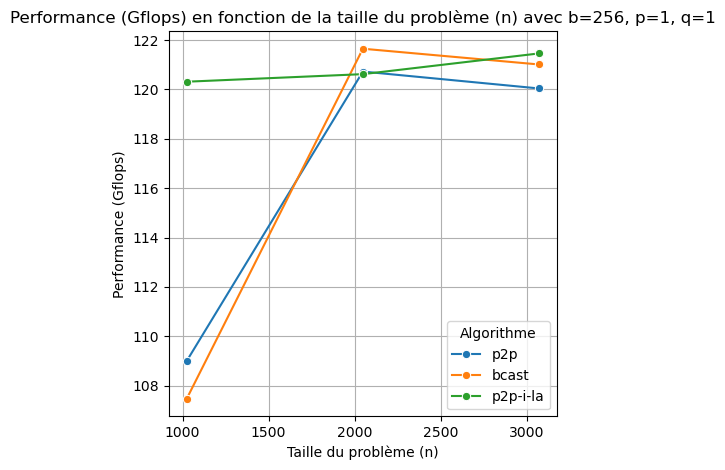

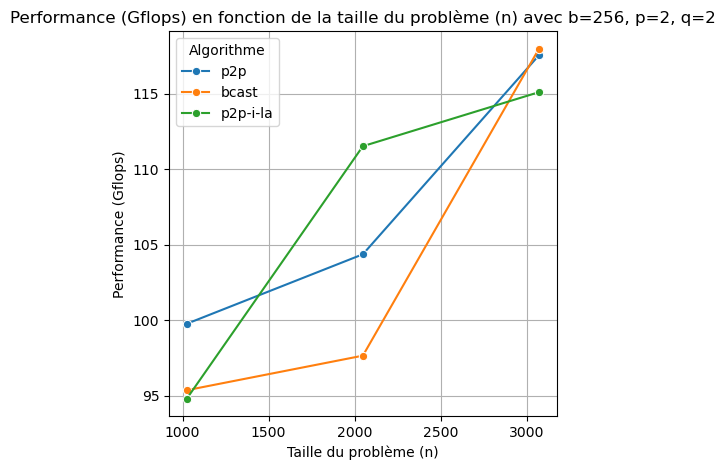

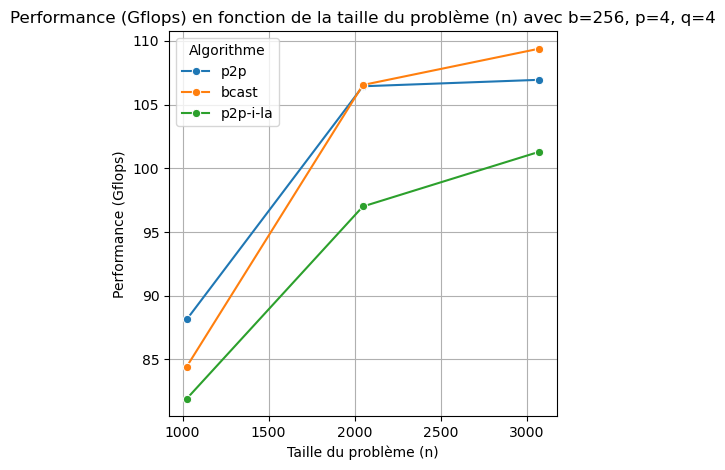

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour b = 256
df_filtered = df_f[df_f['b'] == 256]

# Ajouter une colonne pour combiner p, q et algo dans une chaîne de caractères
df_filtered['p_q_algo'] = df_filtered.apply(lambda row: f"{row['algo']} (p={row['p']}, q={row['q']})", axis=1)

# Valeurs de p et q à utiliser
p_q_values = [(1, 1), (2, 2), (4, 4)]

# Création des graphiques pour chaque combinaison de p et q
for p, q in p_q_values:
    df_pq = df_filtered[(df_filtered['p'] == p) & (df_filtered['q'] == q)]
    
    # Appliquer une condition supplémentaire pour p2p-i-la et lookahead = 2
    df_pq = df_pq[(df_pq['algo'] != 'p2p-i-la') | (df_pq['lookahead'] == 2)]
    
    plt.figure(figsize=(5, 5))
    sns.lineplot(data=df_pq, x='n', y='gflops', hue='algo', marker='o', errorbar=None)
    plt.xlabel('Taille du problème (n)')
    plt.ylabel('Performance (Gflops)')
    plt.title(f'Performance (Gflops) en fonction de la taille du problème (n) avec b=256, p={p}, q={q}')
    plt.legend(title='Algorithme')
    plt.grid(True)
    plt.show()


Lookahead

/var/folders/sp/4b83tkcj5bl3kgv92lfhbqf40000gn/T/ipykernel_59274/2780135925.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sp/4b83tkcj5bl3kgv92lfhbqf40000gn/T/ipykernel_59274/2780135925.py:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




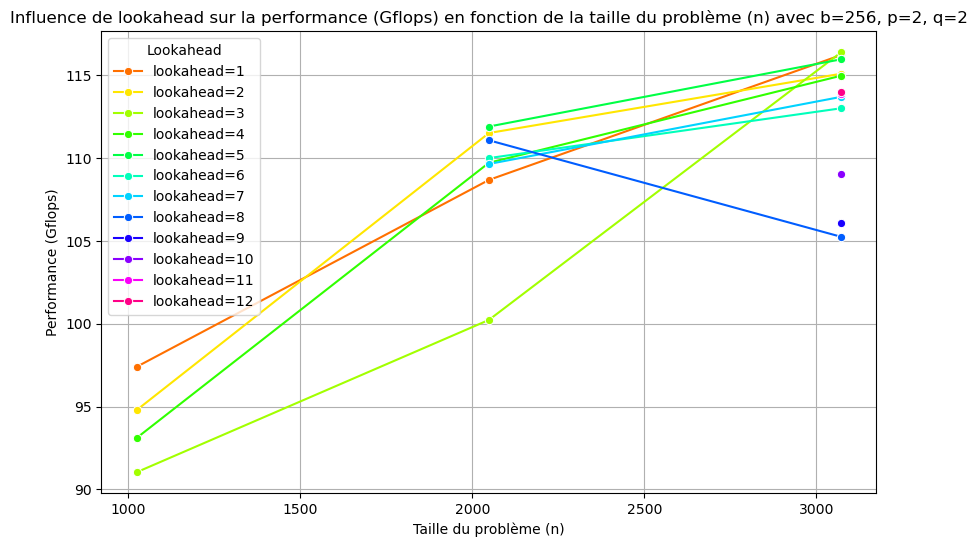

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour b = 256, p = 2, q = 2 et algo = 'p2p-i-la'
df_filtered = df_f[(df_f['b'] == 256) & (df_f['p'] == 2) & (df_f['q'] == 2) & (df_f['algo'] == 'p2p-i-la')]

# Ajouter une colonne pour combiner lookahead et algo dans une chaîne de caractères
df_filtered['lookahead_algo'] = df_filtered.apply(lambda row: f"lookahead={row['lookahead']}", axis=1)

# Créer une palette de couleurs distinctes
palette = sns.color_palette("hsv", 12)  # 12 couleurs très distinctes

# Graphique des performances en fonction de la taille du problème (n) pour différentes valeurs de lookahead
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='n', y='gflops', hue='lookahead_algo', marker='o', ci=None, palette=palette)
plt.xlabel('Taille du problème (n)')
plt.ylabel('Performance (Gflops)')
plt.title('Influence de lookahead sur la performance (Gflops) en fonction de la taille du problème (n) avec b=256, p=2, q=2')
plt.legend(title='Lookahead')
plt.grid(True)
plt.show()


Paramètre b 

        m     n     k    b  p  q      algo  lookahead      gflops
0    1024  1024  1024  256  1  1       p2p          0   54.234865
1    1024  1024  1024  256  1  1       p2p          0  121.691145
2    1024  1024  1024  256  1  1       p2p          0  125.407835
3    1024  1024  1024  256  1  1       p2p          0  122.853750
4    1024  1024  1024  256  1  1       p2p          0  120.808040
..    ...   ...   ...  ... .. ..       ...        ...         ...
445  6144  6144  6144  512  1  1  p2p-i-la         12  123.328162
446  6144  6144  6144  512  1  1  p2p-i-la         12  121.374316
447  6144  6144  6144  512  1  1  p2p-i-la         12  122.624755
448  6144  6144  6144  512  1  1  p2p-i-la         12  122.386953
449  6144  6144  6144  512  1  1  p2p-i-la         12  122.567403

[450 rows x 9 columns]


/var/folders/sp/4b83tkcj5bl3kgv92lfhbqf40000gn/T/ipykernel_59274/2573923404.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sp/4b83tkcj5bl3kgv92lfhbqf40000gn/T/ipykernel_59274/2573923404.py:29: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




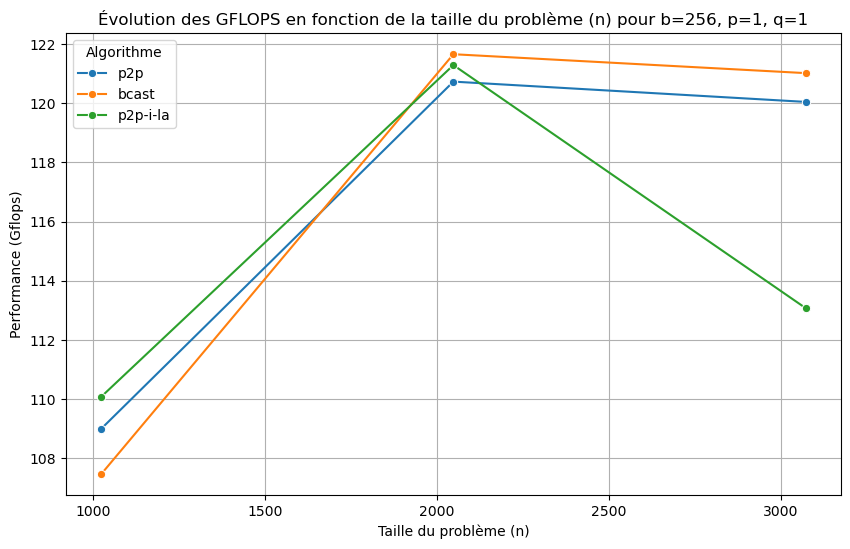

/var/folders/sp/4b83tkcj5bl3kgv92lfhbqf40000gn/T/ipykernel_59274/2573923404.py:29: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




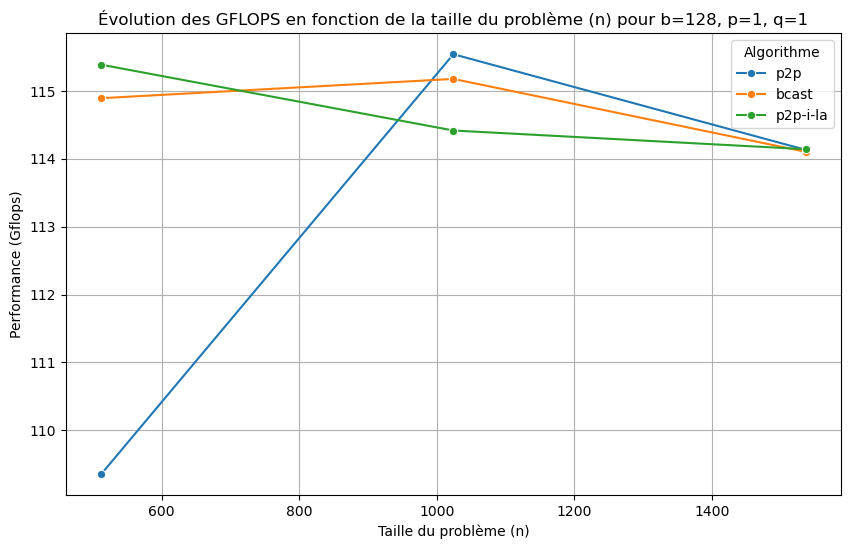

/var/folders/sp/4b83tkcj5bl3kgv92lfhbqf40000gn/T/ipykernel_59274/2573923404.py:29: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




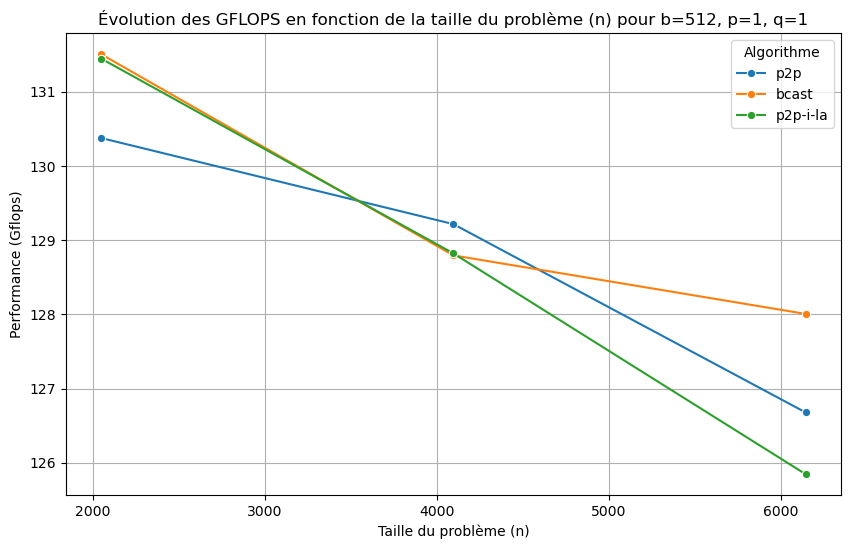

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour p = 2 et q = 2
df_filtered = df_f[(df_f['p'] == 1) & (df_f['q'] == 1)]
print(df_filtered)
# Appliquer les conditions spécifiques de lookahead pour p2p-i-la
def apply_lookahead_conditions(row):
    if row['algo'] == 'p2p-i-la':
        if row['n'] < 1000:
            return 1
        elif 1000 <= row['n'] <= 2048:
            return 2
        else:
            return 5
    return row['lookahead']

df_filtered['lookahead'] = df_filtered.apply(apply_lookahead_conditions, axis=1)

# Obtenir les valeurs uniques de b
unique_b_values = df_filtered['b'].unique()

# Créer un graphique séparé pour chaque valeur de b
for b in unique_b_values:
    df_b = df_filtered[df_filtered['b'] == b]
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_b, x='n', y='gflops', hue='algo', marker='o', ci=None)
    plt.xlabel('Taille du problème (n)')
    plt.ylabel('Performance (Gflops)')
    plt.title(f'Évolution des GFLOPS en fonction de la taille du problème (n) pour b={b}, p=1, q=1')
    plt.legend(title='Algorithme')
    plt.grid(True)
    plt.show()


Evolution du nombre de processus p et q en fonction de n constant 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


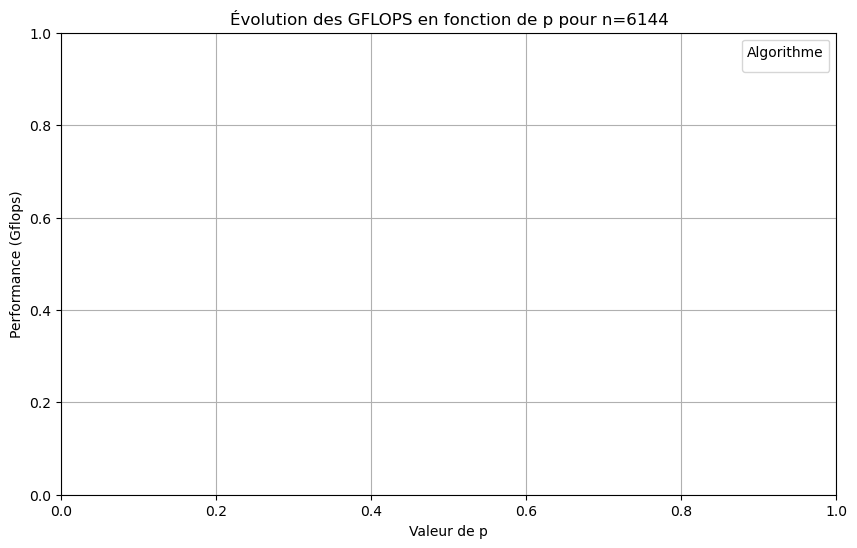

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_filtered = df_f[(df_f['n'] == 2048) & (df_f['b'] == 256)]

def apply_lookahead_conditions(row):
    if row['algo'] == 'p2p-i-la':
        if row['n'] < 1000:
            return 1
        elif 1000 <= row['n'] <= 2048:
            return 2
        else:
            return 5
    return row['lookahead']

df_filtered['lookahead'] = df_filtered.apply(apply_lookahead_conditions, axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='p', y='gflops', hue='algo')
plt.xlabel('Valeur de p')
plt.ylabel('Performance (Gflops)')
plt.title('Évolution des GFLOPS en fonction de p pour n=2048')
plt.legend(title='Algorithme')
plt.grid(True)
plt.show()
